# 05_데이터 정제

데이터 정제란 데이터 분석에 앞서 전처리가 완료된 데이터에 대해 <br> 
`빈값(결측치)` 이나 `정상 범위를 벗어난 값(이상치)`들을 제거하거나 다른 값으로 대체하는 처리를 말합니다.

## `이상치를 먼저 결측치로 바꾼 후, 결측치를 처리하는 것이 기본적인 순서이다.`

## #01.결측치

> 비어있는 값 (DB에서의 NULL 과 비슷한 의미)

현장에서 만들어진 실제 데이터의 수집 과정에서 발생한 오류로 인해 결측치를 포함하고 있는 경우가 많다.

결측치가 있으면 통계 처리 함수가 적용되지 않거나 분석 결과가 왜곡되는 문제가 발생한다.

### 1) 결측치를 처리하는 대표적인 방법

1. 결측치 `소거법`
    - 결측치가 포함된 행 혹은 열을 제거하는 방법
    - 결측치가 포함된 데이터가 적은 경우는 상관없지만 결측치가 많을 경우 결과 왜곡이 발생할 수 있다.
1. 결측치 `대체법`
    - 결측치에 대표값이나 기술통계값을 적용하는 방법
    
### 2) 필요한 기본 패키지와 샘플 데이터 준비

#### a) 패키지 가져오기

In [1]:
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
from pandas import merge
import numpy as np

In [2]:
df = read_csv('grade.csv', encoding='euc-kr')
df

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [3]:
# 열 추가
df['한국사'] = np.nan
df

,이름,학년,성별,국어,영어,수학,과학,한국사
0,철수,1,남자,98,NaN,88.0,64.0,NaN
1,영희,2,여자,88,90.0,62.0,72.0,NaN
2,민수,1,남자,92,70.0,NaN,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0,NaN
4,호영,4,남자,120,50.0,NaN,88.0,NaN


In [4]:
# 행추가
df.loc[len(df)] = ['민철', 4, '남자', np.nan, np.nan, np.nan, np.nan, np.nan]
df

,이름,학년,성별,국어,영어,수학,과학,한국사
0,철수,1,남자,98.0,NaN,88.0,64.0,NaN
1,영희,2,여자,88.0,90.0,62.0,72.0,NaN
2,민수,1,남자,92.0,70.0,NaN,NaN,NaN
3,수현,3,여자,63.0,60.0,31.0,70.0,NaN
4,호영,4,남자,120.0,50.0,NaN,88.0,NaN
5,민철,4,남자,NaN,NaN,NaN,NaN,NaN


In [5]:
lis = list(df['이름'])

dic = {}
for i, v in enumerate(lis) :
    dic[i] = v

df.rename(index=dic, inplace=True)
df.drop(['이름', '학년', '성별'], axis=1, inplace=True)
df

,국어,영어,수학,과학,한국사
철수,98.0,NaN,88.0,64.0,NaN
영희,88.0,90.0,62.0,72.0,NaN
민수,92.0,70.0,NaN,NaN,NaN
수현,63.0,60.0,31.0,70.0,NaN
호영,120.0,50.0,NaN,88.0,NaN
민철,NaN,NaN,NaN,NaN,NaN


## set_index 함수 사용

In [6]:
df2 = read_csv('grade.csv', encoding='euc-kr')
df2.set_index('이름', drop=True, inplace=True)
df2.drop(['학년', '성별'], axis=1, inplace=True)
df2

,국어,영어,수학,과학
이름,,,,
철수,98,NaN,88.0,64.0
영희,88,90.0,62.0,72.0
민수,92,70.0,NaN,NaN
수현,63,60.0,31.0,70.0
호영,120,50.0,NaN,88.0


## ==============================================

### 3) 데이터의 전체 크기와 형태 확인

#### a) 데이터프레임의 전체 크기 조회

> 조회 결과는 튜플 타입으로 리턴된다.

In [7]:
rows, cols = df.shape
print("행 : " , rows)
print("열 : " , cols)

행 :  6
열 :  5


#### b) 일부 데이터 확인
> head(숫자) 또는 tail(숫자) , 숫자 생략시 기본값 5개

In [8]:
df.head(3)

,국어,영어,수학,과학,한국사
철수,98.0,NaN,88.0,64.0,NaN
영희,88.0,90.0,62.0,72.0,NaN
민수,92.0,70.0,NaN,NaN,NaN


In [9]:
df.tail(3)

,국어,영어,수학,과학,한국사
수현,63.0,60.0,31.0,70.0,NaN
호영,120.0,50.0,NaN,88.0,NaN
민철,NaN,NaN,NaN,NaN,NaN


#### c) 각 데이터의 결측치 여부 확인

> - 각 열에 대해 결측치가 아닐 경우 False , 결측치면 True 로 만든다.
> - `isna()` 함수 사용 , isnull() 도 같은 기능

In [10]:
df_n = df.isna()
df_n

,국어,영어,수학,과학,한국사
철수,False,True,False,False,True
영희,False,False,False,False,True
민수,False,False,True,True,True
수현,False,False,False,False,True
호영,False,False,True,False,True
민철,True,True,True,True,True


#### d) 각 열별로 결측치 수 파악하기

- `isna()` 로 도출된 데이터프레임의 열 별로 `합계`를 수행하며 `True` 는 1 , `False` 는 0 으로 계산된다.

In [11]:
df_ns = df_n.sum()
df_ns

국어     1
영어     2
수학     3
과학     2
한국사    6
dtype: int64

## ================================================

### 4) 결측치 소거법 
#### a) 결측치가 포함된 모든 행 삭제
- 원본은 변화 없고, 삭제 결과가 리턴된다.
- 만약 원본에 적용하려면, `inplace=True` 사용

#### b) 행에 포함된 값 중 하나라도 결측치인 경우 삭제
> `dropna()` 함수 사용

In [12]:
na1 = df.dropna()
na1

,국어,영어,수학,과학,한국사


#### c) 특정 열에 대한 결측치만 제거하기

> - `dropna()` 간단하다는 장점이 있지만, 자칫 분석에 필요한 행 데이터까지 손실될 우려가 있다.
> - `subset` 파라미터에 정제를 적용할 컬럼 이름을 리스트 형태로 나열 시 원하는 컬럼에 대해서만 적용할 수 있다.

In [13]:
# 수학 컬럼에 관련된 결측치만 삭제하고자 할때
na2 = df.dropna(subset=['수학'])
na2

,국어,영어,수학,과학,한국사
철수,98.0,NaN,88.0,64.0,NaN
영희,88.0,90.0,62.0,72.0,NaN
수현,63.0,60.0,31.0,70.0,NaN


In [14]:
# 여러개
na3 = df.dropna(subset=['영어', '과학'])
na3

,국어,영어,수학,과학,한국사
영희,88.0,90.0,62.0,72.0,NaN
수현,63.0,60.0,31.0,70.0,NaN
호영,120.0,50.0,NaN,88.0,NaN


#### d) 행에 포함된 모든 값이 결측치인 경우 삭제
> - 삭제될 가능성이 매우 적다.
> - `how='all'` 파라미터 사용

In [15]:
na4 = df.dropna(how='all')
na4

,국어,영어,수학,과학,한국사
철수,98.0,NaN,88.0,64.0,NaN
영희,88.0,90.0,62.0,72.0,NaN
민수,92.0,70.0,NaN,NaN,NaN
수현,63.0,60.0,31.0,70.0,NaN
호영,120.0,50.0,NaN,88.0,NaN


#### e) 결측치가 포함된 모든 열 삭제
> `axis=1` 파라미터를 추가하면 적영된다.

In [16]:
na5 = df.dropna(axis=1)
na5

""
철수
영희
민수
수현
호영
민철


#### f) 특정 행에 대한 결측치를 가지고 있는 열 삭제하기

In [17]:
na6 = df.dropna(axis=1, subset=['호영'])
na6

,국어,영어,과학
철수,98.0,NaN,64.0
영희,88.0,90.0,72.0
민수,92.0,70.0,NaN
수현,63.0,60.0,70.0
호영,120.0,50.0,88.0
민철,NaN,NaN,NaN


#### g) 열에 포함된 모든 값이 결측치인 경우 삭제

In [18]:
na7 = df.dropna(axis=1, how='all')
na7

,국어,영어,수학,과학
철수,98.0,NaN,88.0,64.0
영희,88.0,90.0,62.0,72.0
민수,92.0,70.0,NaN,NaN
수현,63.0,60.0,31.0,70.0
호영,120.0,50.0,NaN,88.0
민철,NaN,NaN,NaN,NaN


## ==============================================

### 5) 결측치 대체법

#### a) 대표값으로 대체하기
> - `fillna()` 함수 사용
> - 원본은 변화없고, 대체 결과만 리턴된다.
> - 원본에 적용하려면 `inplace=True` 사용

In [19]:
df2 = df.fillna(value=0)
df2

,국어,영어,수학,과학,한국사
철수,98.0,0.0,88.0,64.0,0.0
영희,88.0,90.0,62.0,72.0,0.0
민수,92.0,70.0,0.0,0.0,0.0
수현,63.0,60.0,31.0,70.0,0.0
호영,120.0,50.0,0.0,88.0,0.0
민철,0.0,0.0,0.0,0.0,0.0


#### b) 통계분석 기법으로 대체하기

> 숫자 형식이 아닌 컬럼은 `mean(평균)` 이나 `median(중위값)` 을 사용할 수 없다.

#### - 결측치를 정제할 규칙 정의

> - SimpleImputer(missing_values=numpy.nan, strategy='')
> - strategy = `'mean'` 또는 `'median'` ...

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#### - 결측치를 처리할 데이터 추출

In [21]:
df3 = df.filter(['국어', '영어', '수학', '과학'])
df4 = df3.drop('민철')
df4

,국어,영어,수학,과학
철수,98.0,NaN,88.0,64.0
영희,88.0,90.0,62.0,72.0
민수,92.0,70.0,NaN,NaN
수현,63.0,60.0,31.0,70.0
호영,120.0,50.0,NaN,88.0


In [28]:
df_imputed = DataFrame(imputer.fit_transform(df4), columns=df4.columns, index=df4.index)

# 소숫점 첫째자리
df_imputed = df_imputed.round(1)
df_imputed

,국어,영어,수학,과학
철수,98.0,67.5,88.0,64.0
영희,88.0,90.0,62.0,72.0
민수,92.0,70.0,60.3,73.5
수현,63.0,60.0,31.0,70.0
호영,120.0,50.0,60.3,88.0


## ====================================================

## #02. 이상치(극단치) 정제

### 정상적인 범위를 벗어나, 극단적으로 크거나 작은 데이터

#### 이상치 제거를 위해서는, 먼저 어디까지를 정상 범위로 볼 것인가를 정해야한다.

1. `논리적`으로 판단하여 정하기
   - 예를들어 성인의 몸무게가 40~150kg 을 벗어나는 경우는 드물 것으로 판단하고, 이 범위를 벗어나면 극단치로 간주한다.
   - 데이터 분석가의 주관에 따른다.

1. `통계적`인 기준을 이용하기
   - 상하위 0.3% 또는 +-3 표준편차에 해당하는 만큼 극단적으로 크거나 작은 데이터는 극단치로 간주하는 방법

### 1) 이상치 존재 여부를 확인하기 위해서 상자그림 표시

> 이상치를 원으로 표현하기 때문에 한 눈에 확인할 수 있다.

In [25]:
pyplot.rcParams["font.family"] = 'Malgun Gothic' # 사용할 폰트이름 지정(맑은 고딕)
pyplot.rcParams["font.size"] = 16                # 글자 크기
pyplot.rcParams["figure.figsize"] = (20,10)       # 그래프의 가로, 세로 크기 (inch단위)

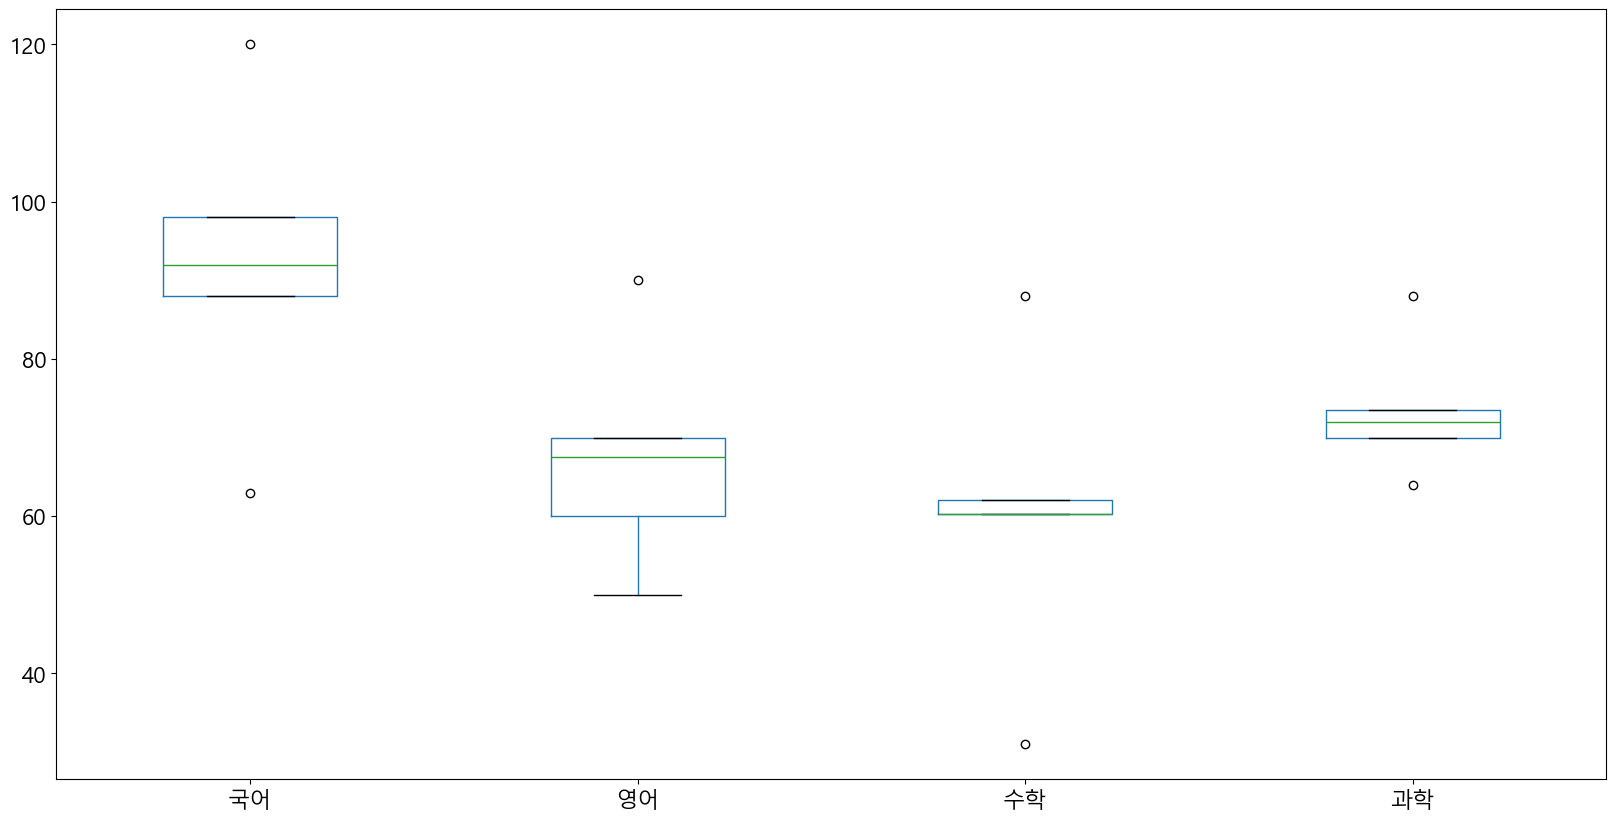

In [34]:
df_imputed.boxplot()
pyplot.grid()
pyplot.show()

### 2) 이상치를 결측치로 변경하기
#### 국어점수에 대한 이상치 필터링

In [35]:
df_k = df_imputed.query('국어>100')
df_k

,국어,영어,수학,과학
호영,120.0,50.0,60.3,88.0


In [36]:
df_k_index = list(df_k.index)
df_k_index

['호영']

#### 이상치를 갖는 인덱스에 대한 국어점수를 결측치로 변경

In [39]:
for i in df_k_index : 
    df_imputed.loc[i, '국어'] = np.nan

df_imputed

,국어,영어,수학,과학
철수,98.0,67.5,88.0,64.0
영희,88.0,90.0,62.0,72.0
민수,92.0,70.0,60.3,73.5
수현,63.0,60.0,31.0,70.0
호영,NaN,50.0,60.3,88.0


In [40]:
# 위에서 정의한 결측치 규칙을 가져와서 사용
df_imputed2 = DataFrame(imputer.fit_transform(df_imputed), 
                        columns=df_imputed.columns, index=df_imputed.index)

# 소숫점 첫째자리
df_imputed2 = df_imputed2.round(1)
df_imputed2

,국어,영어,수학,과학
철수,98.0,67.5,88.0,64.0
영희,88.0,90.0,62.0,72.0
민수,92.0,70.0,60.3,73.5
수현,63.0,60.0,31.0,70.0
호영,85.2,50.0,60.3,88.0


### => 실제로는 이상치를 먼저 처리해서 결측치로 바꾼 후, 결측치를 변경해주는 것이 효율적이다.